### About Dataset

This dataset was collected via Python scraper in March 2023 and contains:

information about all beauty products (over 8,000) from the Sephora online store, including product and brand names, prices, ingredients, ratings, and all features.
user reviews (over 1 million on over 2,000 products) of all products from the Skincare category, including user appearances, and review ratings by other users

Dataset Usage Examples

Exploratory Data Analysis (EDA): Explore product categories, regular and discount prices, brand popularity, the impact of different characteristics on price, and ingredient trends

Sentiment Analysis: Is the emotional tone of the review positive, negative, or neutral? Which brands or products have the most positive or negative reviews?
Text Analysis: What do customers say most often in their negative and positive reviews? Do customers have any common problems with their skincare?
Recommender System: Analyzing the customer's past purchase history and reviews, suggest products that are likely to be of interest to them
Data Visualization: What are the most popular brands and products? What is the distribution of prices? Which products are closest to each other in ingredients? What does the cloud of the most frequently used words look like?

https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews

In [1]:
# To store the data

%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
import os
current_directory = os.getcwd()
print(current_directory)

/Users/benazirrowe/Documents/deepLearningRecommender/notebooks


In [3]:
# Load product info
product_info = pd.read_csv('../data/raw/archive/product_info.csv')



In [8]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

Indicator variables: 15  limited_edition, new, online_only, out_of_stock    

Integer variables: loves_count, rating, reviews, price_usd, value_price_usd, sale_price_usd

Categorical: primary_category, secondary_category, tertiary_category

In [11]:
product_info.primary_category.unique()

array(['Fragrance', 'Bath & Body', 'Mini Size', 'Hair', 'Makeup',
       'Skincare', 'Tools & Brushes', 'Men', 'Gifts'], dtype=object)

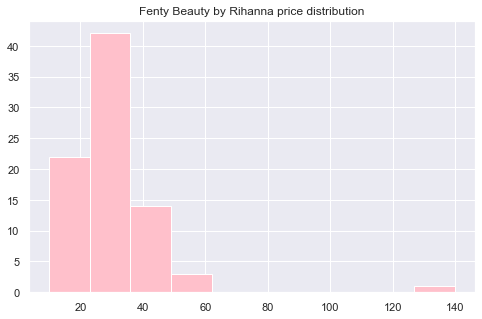

In [5]:

_=subset = product_info[product_info['brand_name'] == 'Fenty Beauty by Rihanna']
_= sns.set(rc={'figure.figsize':(8,5)})
_= subset['price_usd'].hist( color='pink')
_= plt.title('Fenty Beauty by Rihanna price distribution')

Data Visualization: What are the most popular brands and products? What is the distribution of prices? Which products are closest to each other in ingredients? What does the cloud of the most frequently used words look like?

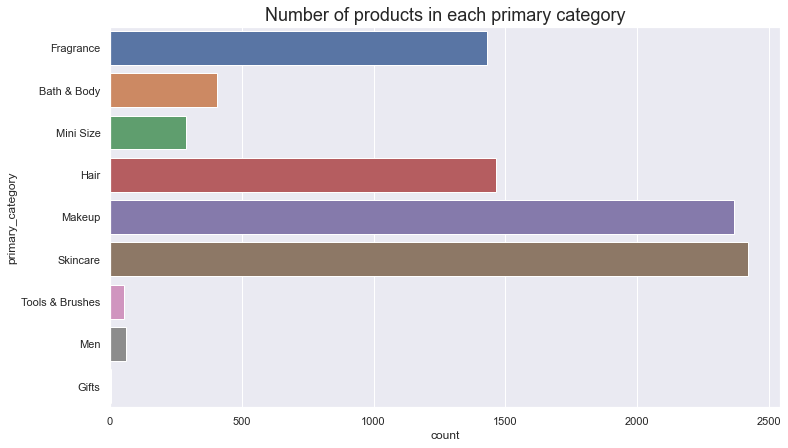

In [25]:
_= sns.countplot(y=product_info['primary_category'])
_= plt.title('Number of products in each primary category', fontsize =18)
_= sns.set(rc={'figure.figsize':(12,7)})


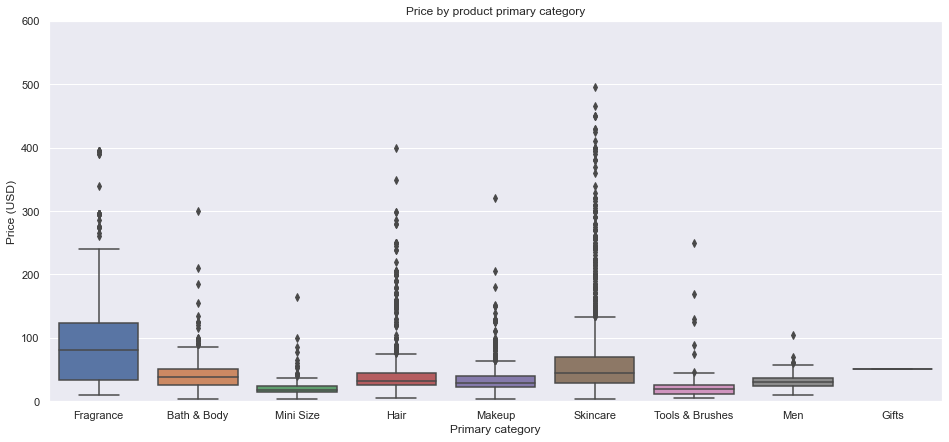

In [11]:
_ = sns.boxplot(x='primary_category', y='price_usd', data=product_info)

_ = plt.xlabel('Primary category')
_ = plt.ylabel('Price (USD)')
_= plt.title('Price by product primary category')
_= plt.ylim(0, 600)
_= sns.set(rc={'figure.figsize':(16,7)})
plt.show()

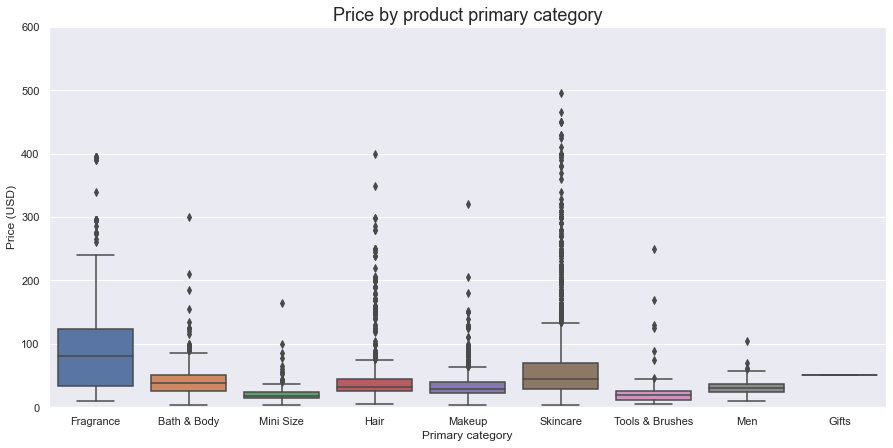

In [20]:
_ = sns.boxplot(x='primary_category', y='price_usd', data=product_info)
_ = plt.xlabel('Primary category')
_ = plt.ylabel('Price (USD)')
_= plt.title('Price by product primary category', fontsize=18)
_= plt.ylim(0, 600)
_= sns.set(rc={'figure.figsize':(15,6)})
plt.show()

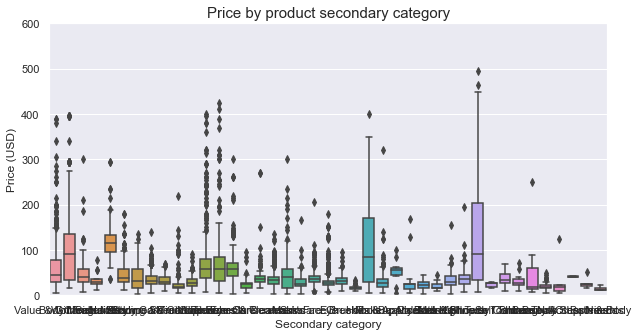

In [15]:
_ = sns.boxplot(x='secondary_category', y='price_usd', data=product_info)

_ = plt.xlabel('Secondary category')
_ = plt.ylabel('Price (USD)')
_= plt.title('Price by product secondary category', fontsize=15)
_= plt.ylim(0, 600)
_= sns.set(rc={'figure.figsize':(16,7)})
plt.show()

<AxesSubplot:xlabel='count', ylabel='secondary_category'>

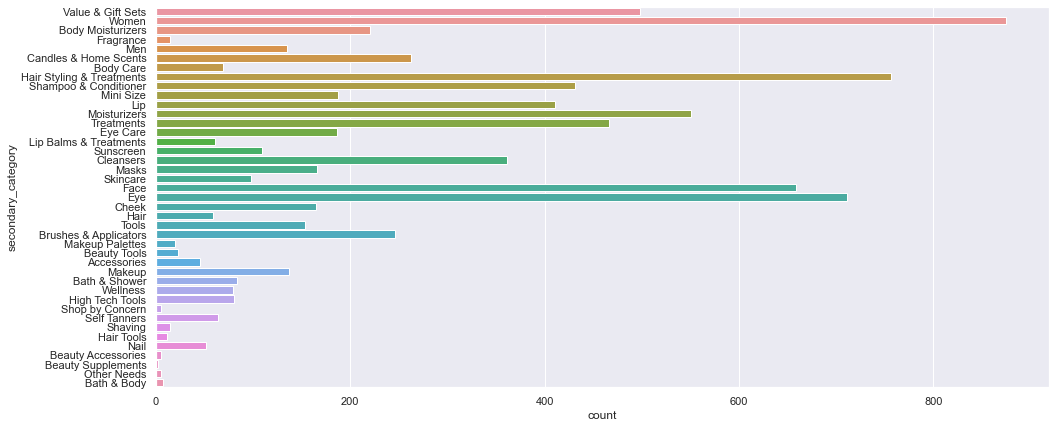

In [25]:
sns.countplot(y=product_info['secondary_category'])

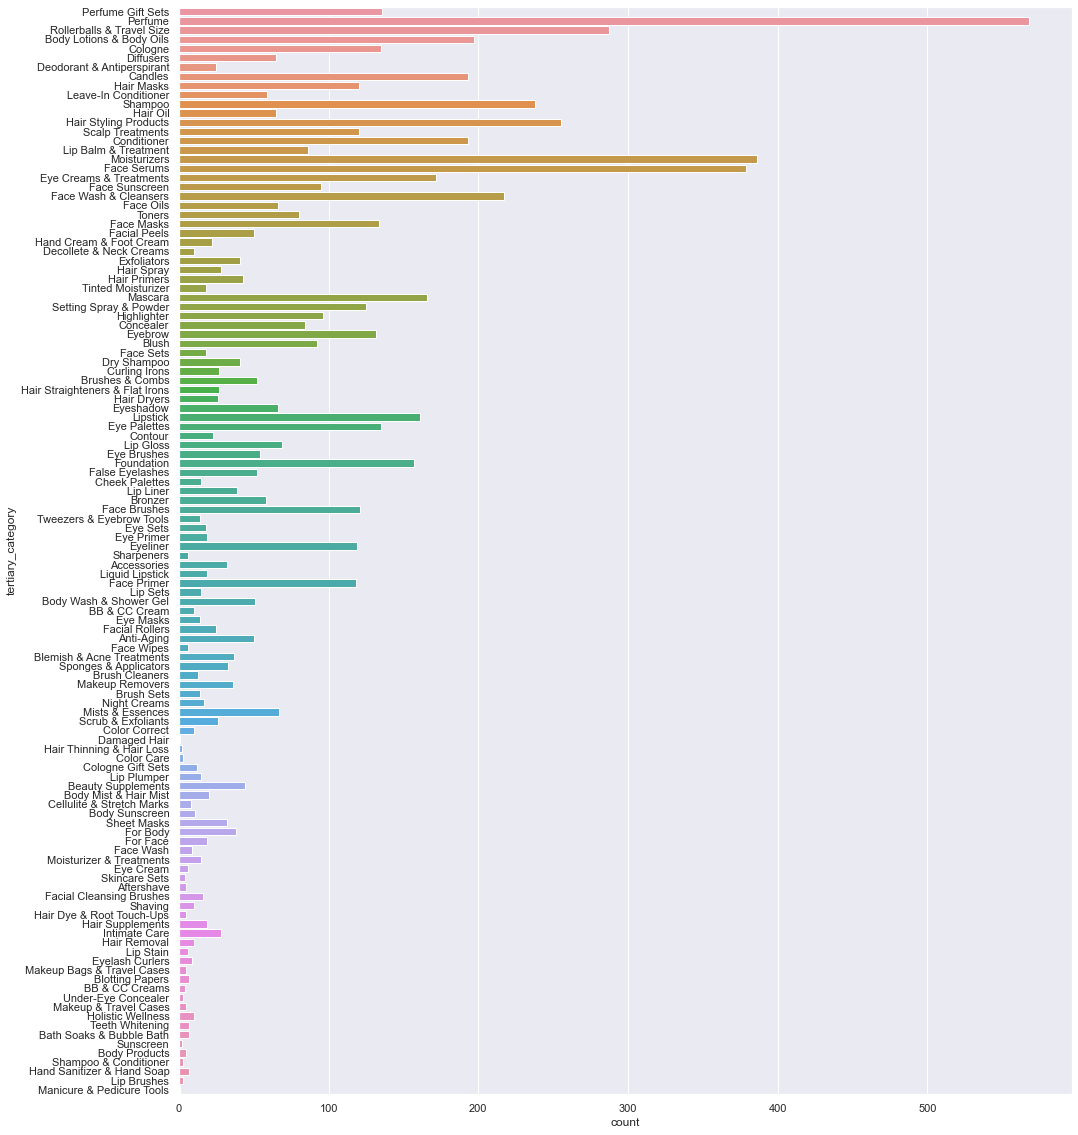

In [29]:
_= sns.countplot(y=product_info['tertiary_category'])
_= sns.set(rc={'figure.figsize':(16,25)})
plt.show()

In [11]:
product_info.secondary_category.unique()

array(['Value & Gift Sets', 'Women', 'Body Moisturizers', 'Fragrance',
       'Men', 'Candles & Home Scents', 'Body Care',
       'Hair Styling & Treatments', 'Shampoo & Conditioner', 'Mini Size',
       'Lip', 'Moisturizers', 'Treatments', 'Eye Care',
       'Lip Balms & Treatments', 'Sunscreen', 'Cleansers', 'Masks',
       'Skincare', 'Face', 'Eye', 'Cheek', 'Hair', 'Tools',
       'Brushes & Applicators', 'Makeup Palettes', 'Beauty Tools',
       'Accessories', 'Makeup', 'Bath & Shower', 'Wellness',
       'High Tech Tools', 'Shop by Concern', nan, 'Self Tanners',
       'Shaving', 'Hair Tools', 'Nail', 'Beauty Accessories',
       'Beauty Supplements', 'Other Needs', 'Bath & Body'], dtype=object)

In [12]:
product_info.child_count.unique()

array([  0,   2,  10,   1,   3,   5,  11,  17,   9,   6,  15,  23,   4,
        49,   7,  21,   8,  24,  12,  78,  19,  39,  14,  29,  34,  25,
        16,  22,  41,  13,  20,  43,  50,  37,  55,  27,  30, 105,  40,
        35,  31,  33,  18,  28,  38,  26,  45,  32,  59,  47,  73,  46,
        36,  63,  51])

<AxesSubplot:xlabel='count', ylabel='primary_category'>

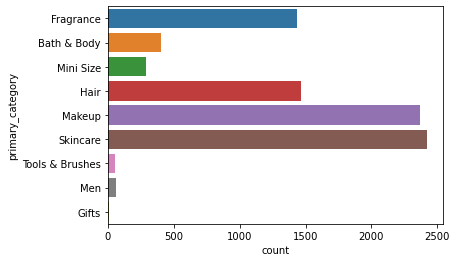

(14,)


<AxesSubplot:title={'center':'Number of missing values per field'}>

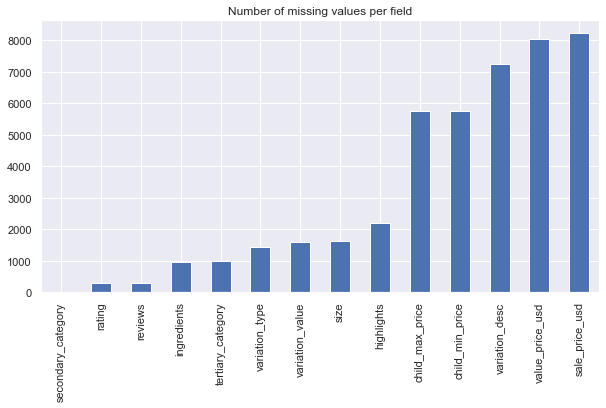

In [81]:
#Explore the missing data

missing = product_info.isnull().sum()
missing = missing[missing > 0]
print(missing.shape)
missing.sort_values(inplace=True)
missing.plot.bar(title="Number of missing values per field",figsize=(10, 5))

There are many auxilliary variables that do not exist for every product. I would first drop the columns:sale_price_usd, value_price_usd, variation_desc, child_min_price, child_max_price, hightlights, tertiary_category, ingredients and variation_value. Next I woud drop the rows for which reviews or ratings do not exist. 

In [82]:
product_info.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [83]:
product_info = product_info.drop([ 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price',  'variation_type', 'variation_value', 'variation_desc',
       'value_price_usd',
       'sale_price_usd'], axis=1)


In [84]:
product_info.shape

(8494, 18)

Text(0.5, 1.0, 'Price (USD) distribution')

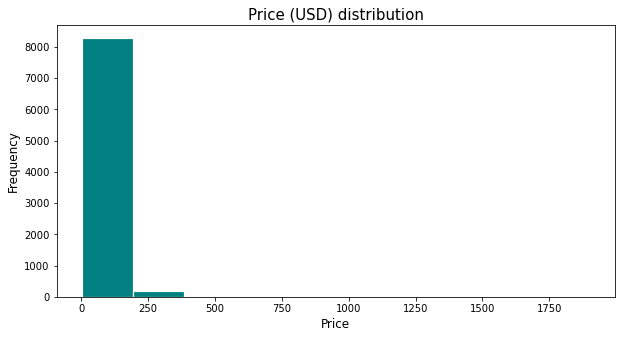

In [45]:
fig = plt.figure(figsize=(10, 5))
plt.hist(product_info['price_usd'],color='teal', edgecolor='white', linewidth=1.2)

# Add labels and title
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Price (USD) distribution', fontsize=15)

The cutoff for bottom 99% is:  107.0


Text(0.5, 1.0, 'Price (USD) for 90 % of products')

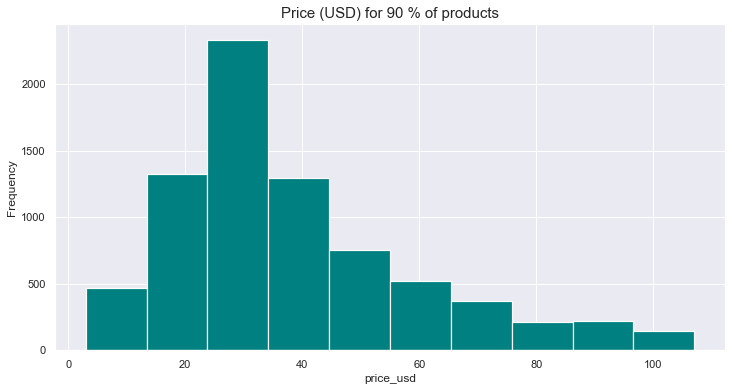

In [14]:
#zoom in on reviews

sorted_data = product_info.sort_values(by='price_usd', ascending=True)
sorted_data = sorted_data.reset_index(drop=True)
rows_to_keep = int(round(len(sorted_data)*0.90))
cutoff = sorted_data.loc[rows_to_keep,'price_usd']
bottom_90_percent = sorted_data.iloc[:rows_to_keep, :]
print("The cutoff for bottom 99% is: ", cutoff)
top_10_percent = sorted_data.iloc[rows_to_keep:, :]

fig = plt.figure(figsize=(12, 6))
plt.hist(bottom_90_percent['price_usd'],color='teal', edgecolor='white', linewidth=1.2)

# Add labels and title
plt.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('price_usd', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Price (USD) for 90 % of products', fontsize=15)



In [85]:
product_info['rating']

0       3.6364
1       4.1538
2       4.2500
3       4.4762
4       3.2308
         ...  
8489    4.4286
8490    4.6367
8491    5.0000
8492       NaN
8493       NaN
Name: rating, Length: 8494, dtype: float64

Text(0.5, 1.0, 'Ratings distribution')

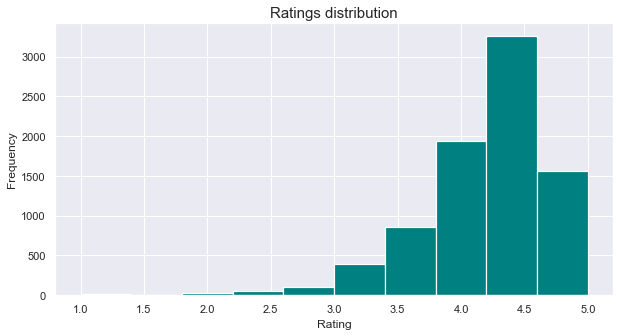

In [26]:
fig = plt.figure(figsize=(10, 5))
plt.hist(product_info['rating'],color='teal', edgecolor='white', linewidth=1.2)

# Add labels and title
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Ratings distribution', fontsize=15)

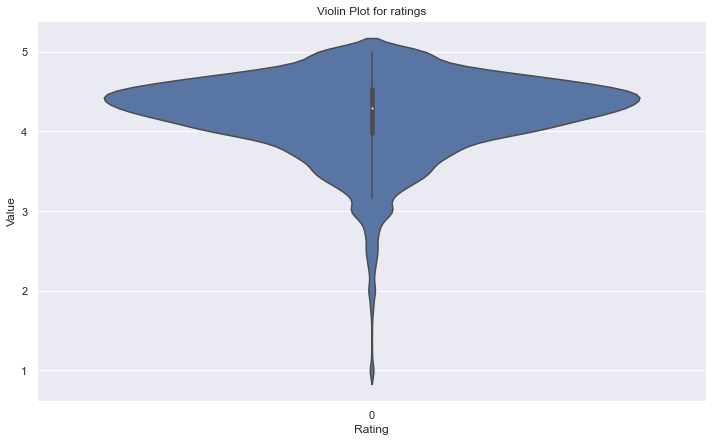

In [27]:
# Create violin plot
sns.violinplot(data=product_info['rating'])

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Value')
plt.title('Violin Plot for ratings')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Reviews distribution')

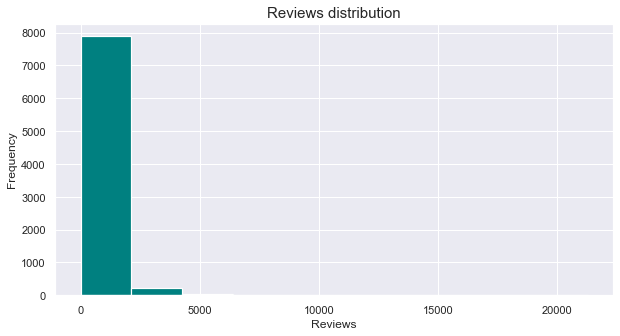

In [28]:
fig = plt.figure(figsize=(10, 5))
plt.hist(product_info['reviews'],color='teal', edgecolor='white', linewidth=1.2)

# Add labels and title
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Reviews', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Reviews distribution', fontsize=15)

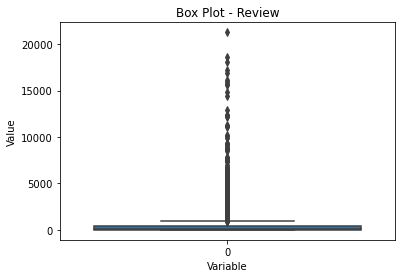

In [44]:
sns.boxplot(data=product_info['reviews'])

# Add labels and title
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Box Plot - Review')

# Show the plot
plt.show()

The cutoff for bottom 99% is:  1466.0


Text(0.5, 1.0, 'The number of user reviews for a product for 90 % of products')

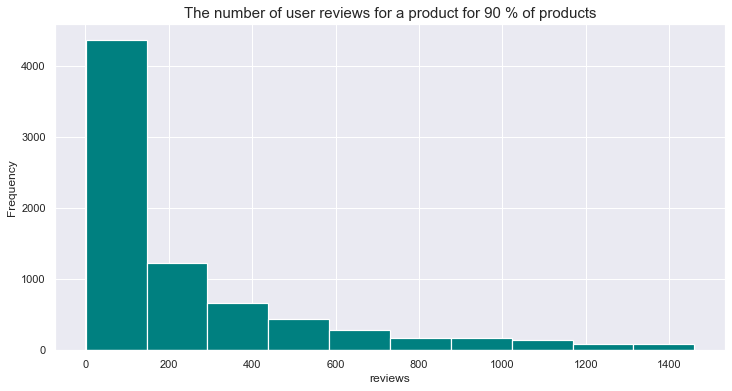

In [29]:
#zoom in on reviews

sorted_data = product_info.sort_values(by='reviews', ascending=True)
sorted_data = sorted_data.reset_index(drop=True)
rows_to_keep = int(round(len(sorted_data)*0.90))
cutoff = sorted_data.loc[rows_to_keep,'reviews']
bottom_90_percent = sorted_data.iloc[:rows_to_keep, :]
print("The cutoff for bottom 99% is: ", cutoff)
top_10_percent = sorted_data.iloc[rows_to_keep:, :]

fig = plt.figure(figsize=(12, 6))
plt.hist(bottom_90_percent['reviews'],color='teal', edgecolor='white', linewidth=1.2)

# Add labels and title
plt.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('reviews', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('The number of user reviews for a product for 90 % of products', fontsize=15)


Text(0.5, 1.0, 'Primary category')

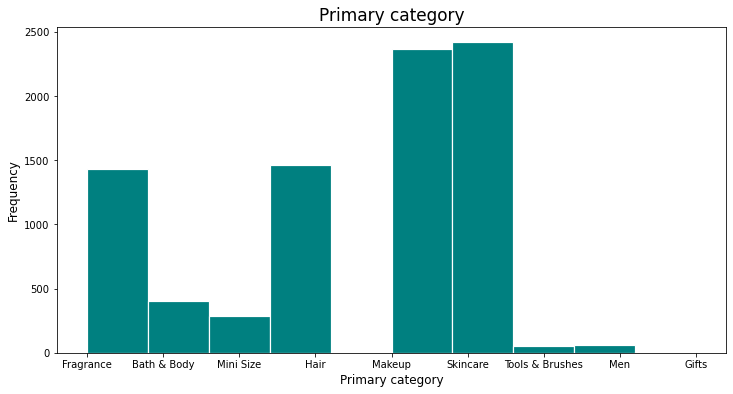

In [29]:
fig = plt.figure(figsize=(12, 6))
plt.hist(product_info['primary_category'],color='teal', edgecolor='white', linewidth=1.2)

# Add labels and title


plt.xlabel('Primary category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Primary category', fontsize=17)

<AxesSubplot:xlabel='count', ylabel='secondary_category'>

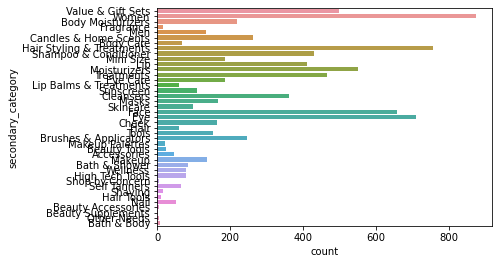

In [39]:
sns.countplot(y=product_info['secondary_category'])

Text(0.5, 1.0, 'Loves distribution')

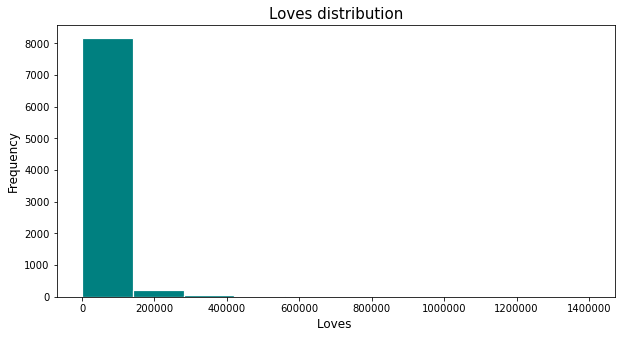

In [31]:
fig = plt.figure(figsize=(10, 5))
plt.hist(product_info['loves_count'],color='teal', edgecolor='white', linewidth=1.2)

# Add labels and title
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Loves ', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Loves distribution', fontsize=15)

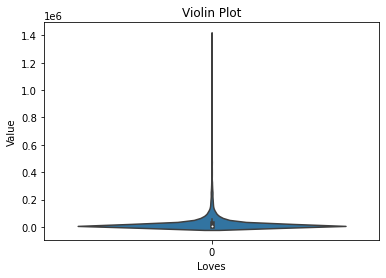

In [42]:
# Create violin plot
sns.violinplot(data=product_info['loves_count'])

# Add labels and title
plt.xlabel('Loves')
plt.ylabel('Value')
plt.title('Violin Plot')

# Show the plot
plt.show()

/Users/benazirrowe/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='limited_edition', ylabel='count'>

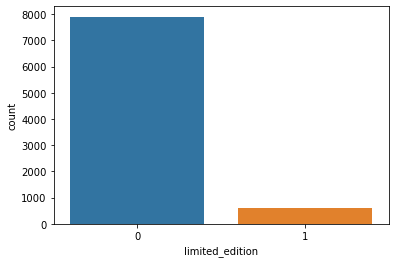

In [32]:
sns.countplot(product_info.limited_edition)

<AxesSubplot:xlabel='new', ylabel='count'>

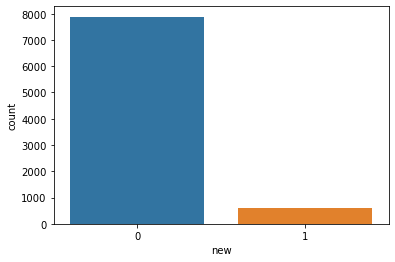

In [35]:
sns.countplot(x= product_info['new'])

<AxesSubplot:xlabel='out_of_stock', ylabel='count'>

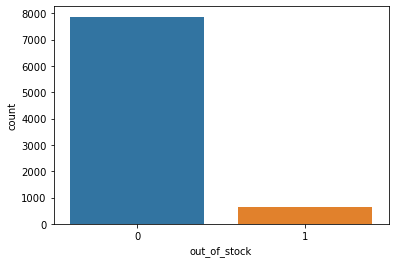

In [36]:
sns.countplot(x= product_info['out_of_stock'])

<AxesSubplot:xlabel='sephora_exclusive', ylabel='count'>

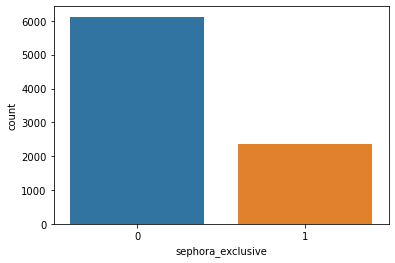

In [37]:
sns.countplot(x= product_info['sephora_exclusive'])

Text(0.5, 1.0, 'Child count distribution')

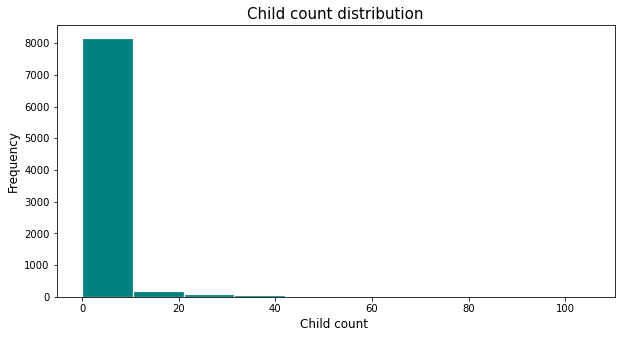

In [38]:
fig = plt.figure(figsize=(10, 5))
plt.hist(product_info['child_count'],color='teal', edgecolor='white', linewidth=1.2)

# Add labels and title
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Child count ', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Child count distribution', fontsize=15)

Based on the report, we can drop sale price and value price since they are very correlated. Also drop child min price and max price, drop tertiary category. Drop variation variables and size for now. 

(3,)


<AxesSubplot:>

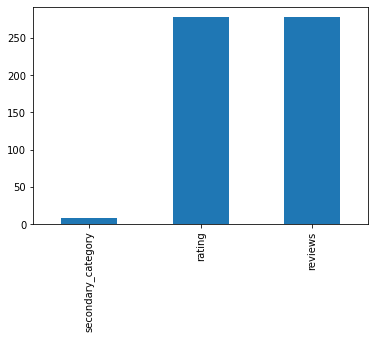

In [56]:
#Explore the missing data

missing = df.isnull().sum()
missing = missing[missing > 0]
print(missing.shape)
missing.sort_values(inplace=True)
missing.plot.bar()

In [60]:
# Drop rows with missing values
df = df.dropna()

# Display the updated DataFrame
print(df.shape)

(8209, 16)


In [65]:
df.to_csv('../data/processed/product_info_clean.csv', index=False)

# REVIEWS

In [42]:
reviews250 = pd.read_csv('../data/raw/archive/reviews_0_250.csv', low_memory=False, index_col=0)
reviews500 = pd.read_csv('../data/raw/archive/reviews_250_500.csv', low_memory=False, index_col=0)
reviews750 = pd.read_csv('../data/raw/archive/reviews_500_750.csv', low_memory=False, index_col=0)
reviews1000 = pd.read_csv('../data/raw/archive/reviews_750_1000.csv', low_memory=False, index_col=0)
reviews1500 = pd.read_csv('../data/raw/archive/reviews_1000_1500.csv', low_memory=False, index_col=0)
reviewsend = pd.read_csv('../data/raw/archive/reviews_1500_end.csv', low_memory=False, index_col=0)


In [43]:
df = pd.concat([reviews250, reviews500, reviews750, reviews1000, reviews1500, reviewsend])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1301136 entries, 0 to 49976
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   author_id                 1301136 non-null  object 
 1   rating                    1301136 non-null  int64  
 2   is_recommended            1107162 non-null  float64
 3   helpfulness               631670 non-null   float64
 4   total_feedback_count      1301136 non-null  int64  
 5   total_neg_feedback_count  1301136 non-null  int64  
 6   total_pos_feedback_count  1301136 non-null  int64  
 7   submission_time           1301136 non-null  object 
 8   review_text               1299520 non-null  object 
 9   review_title              930754 non-null   object 
 10  skin_tone                 1103798 non-null  object 
 11  eye_color                 1057734 non-null  object 
 12  skin_type                 1172830 non-null  object 
 13  hair_color                1037824 

User characteristics: skin_tone, skin_type, eye_color, skin_type
Product characteristics: product_id, product_name, brand_name, price_usd, helpfulness, is_recommended
Review characteristics: Rating, review_text, review_title, submission_time, author_id 

In [44]:
df.head()

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


(8,)


Text(0.5, 1.0, 'Missing values in first 250 reviews')

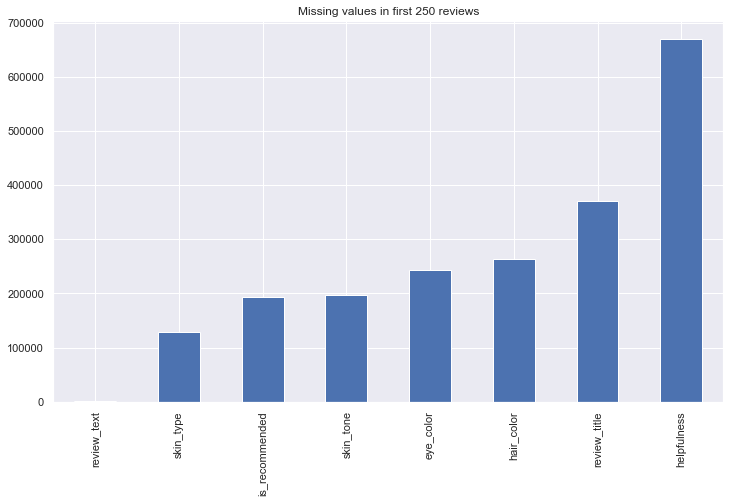

In [45]:
#Explore the missing data

missing = df.isnull().sum()
missing = missing[missing > 0]
print(missing.shape)
missing.sort_values(inplace=True)
missing.plot.bar()
plt.title('Missing values in first 250 reviews')

In [46]:
df.drop(['helpfulness', 'review_title'], axis=1, inplace=True)

In [47]:
df.dropna(axis = 0, how = 'any', inplace = True)    
# All item ids are unique in the dataset
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(1009302, 16)
(843386, 16)


Text(0.5, 1.0, 'Ratings distribution')

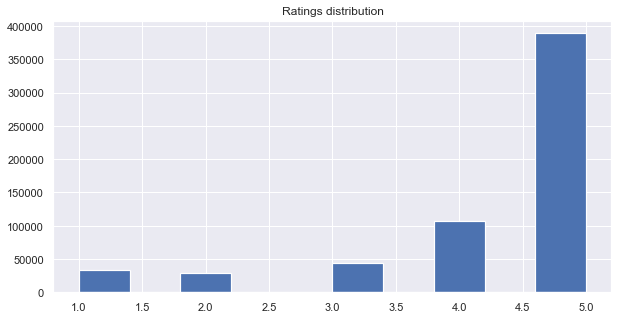

In [48]:
fig = plt.figure(figsize=(10, 5))
plt.hist(reviews250['rating'], linewidth=1.2)
plt.title('Ratings distribution')

(array([ 78550.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 406094.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

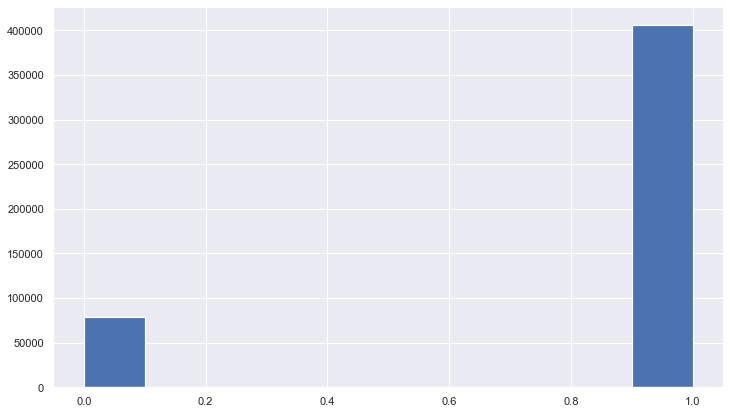

In [49]:
plt.hist(reviews250['is_recommended'], linewidth=1.2)

In [76]:
# Calculate relative frequency
series = pd.Series(reviews250['skin_tone'])
relative_freq = series.value_counts(normalize=True)

series = pd.Series(reviews250['eye_color'])
relative_freq_eye = series.value_counts(normalize=True)

series = pd.Series(reviews250['skin_type'])
relative_freq_type = series.value_counts(normalize=True)

series = pd.Series(reviews250['hair_color'])
relative_freq_hair = series.value_counts(normalize=True)

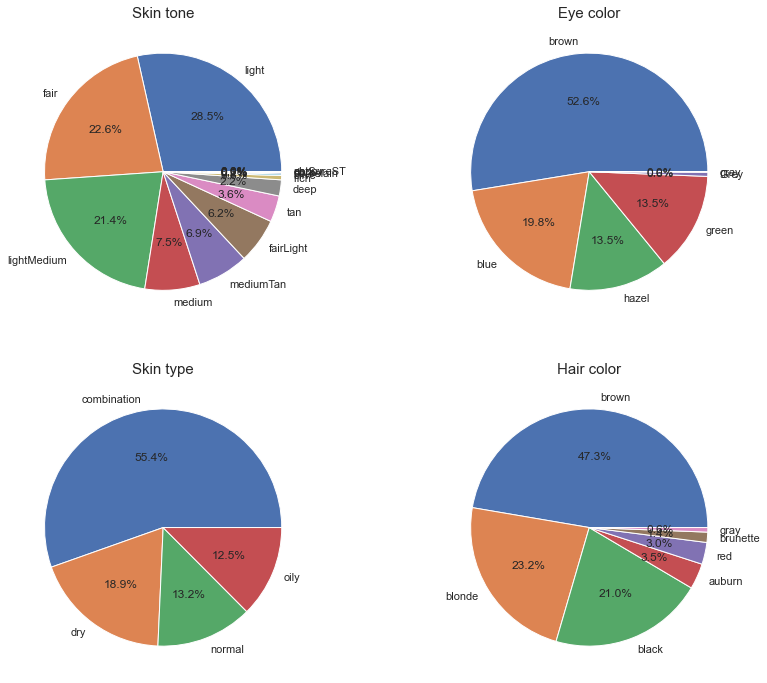

In [79]:
# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14,12))


# Create the pie chart
axs[0, 0].pie(relative_freq.values, labels=relative_freq.index, autopct='%1.1f%%')
axs[0, 0].set_title('Skin tone', fontsize=15)

axs[0, 1].pie(relative_freq_eye.values, labels=relative_freq_eye.index, autopct='%1.1f%%')
axs[0, 1].set_title('Eye color', fontsize=15)


axs[1,0].pie(relative_freq_type.values, labels=relative_freq_type.index, autopct='%1.1f%%')
axs[1,0].set_title('Skin type', fontsize =15)


axs[1,1].pie(relative_freq_hair.values, labels=relative_freq_hair.index, autopct='%1.1f%%')
axs[1,1].set_title('Hair color', fontsize =15)


# Show the chart
plt.show()

eye_color   Grey   blue   brown  gray  green  hazel
hair_color                                         
auburn       206   3603    5624    16   3102   3298
black        232   2175   86424    32   2710   4123
blonde      1053  47483   18129    83  23445  14623
brown        955  31009  120990    26  27398  35398
brunette       0    972    3573    27    807   1004
gray          34    670    1150     1    419    491
red          149   4676    3032    11   3447   2170


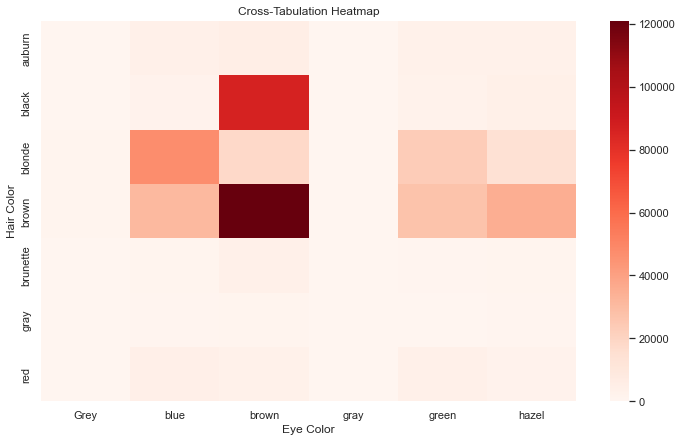

In [58]:
cross_tab = pd.crosstab(reviews250['hair_color'], [reviews250['eye_color']])

print(cross_tab)

sns.heatmap(cross_tab, cmap='Reds')
plt.xlabel('Eye Color')
plt.ylabel('Hair Color')
plt.title('Cross-Tabulation Heatmap')

# Show the plot
plt.show()

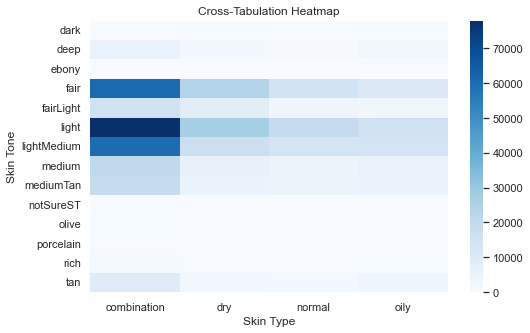

In [78]:
skin =pd.crosstab(reviews250['skin_tone'], reviews250['skin_type'])
sns.heatmap(skin, cmap='Blues')
plt.xlabel('Skin Type')
plt.ylabel('Skin Tone')
plt.title('Cross-Tabulation Heatmap')

# Show the plot
plt.show()

## Interaction matrix

If you don't have explicit interaction data but do have user reviews, you can use the presence of a review as an implicit form of interaction. In this case, the user-item interaction matrix will simply represent whether a user has reviewed an item or not.



In [92]:
df = reviews250[['author_id','product_id']]
print(df)

          author_id product_id
0        1741593524    P504322
1       31423088263    P420652
2        5061282401    P420652
3        6083038851    P420652
4       47056667835    P420652
...             ...        ...
602125   7446977307    P467602
602126   1991973234    P467602
602127   1339171721    P467602
602128   1917233409    P467602
602129   1244540073    P467602

[602130 rows x 2 columns]


In [94]:
# Create the user-product interaction matrix
interaction_matrix = df.pivot_table(index='author_id', columns='product_id', aggfunc=len, fill_value=0)

print(interaction_matrix)

product_id       P114902  P12045  P122718  P122774  P122882  P122900  P12336  \
author_id                                                                      
10000015049            0       0        0        0        0        0       0   
10000060335            0       0        0        0        0        0       0   
10000098796            0       0        0        0        0        0       0   
1000010050             0       0        0        0        0        0       0   
10000117144            0       0        0        0        0        0       0   
...                  ...     ...      ...      ...      ...      ...     ...   
orderGen39837          0       0        0        0        0        0       0   
orderGen51156          0       0        0        0        0        0       0   
orderGen5563740        0       0        0        0        0        0       0   
orderGen703225         0       0        0        0        0        0       0   
orderGen899861         0       0        

In [95]:
print(interaction_matrix.shape)

(339017, 250)


Show which items were rated by user given user_id¶

In [63]:
def rated_items(author_id, df):
    # Get the items rated by the user
    rated_df = df[df['author_id'] == author_id]

    return rated_df

# Example usage:
author_id = '47056667835'  # replace with actual user id
print(rated_items(author_id, df))



Empty DataFrame
Columns: [author_id, rating, is_recommended, total_feedback_count, total_neg_feedback_count, total_pos_feedback_count, submission_time, review_text, skin_tone, eye_color, skin_type, hair_color, product_id, product_name, brand_name, price_usd]
Index: []


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 843386 entries, 2 to 49974
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   author_id                 843386 non-null  object 
 1   rating                    843386 non-null  int64  
 2   is_recommended            843386 non-null  float64
 3   total_feedback_count      843386 non-null  int64  
 4   total_neg_feedback_count  843386 non-null  int64  
 5   total_pos_feedback_count  843386 non-null  int64  
 6   submission_time           843386 non-null  object 
 7   review_text               843386 non-null  object 
 8   skin_tone                 843386 non-null  object 
 9   eye_color                 843386 non-null  object 
 10  skin_type                 843386 non-null  object 
 11  hair_color                843386 non-null  object 
 12  product_id                843386 non-null  object 
 13  product_name              843386 non-null  object 

In [64]:
### See how many ratings each user gave

In [ ]:
# Count the number of ratings each user has made
ratings_count = df.groupby('user_id')['rating'].count()

# Convert the Series to a DataFrame
ratings_count_df = ratings_count.reset_index()

# Rename the columns
ratings_count_df.columns = ['user_id', 'num_ratings']

# Show the DataFrame
#print(ratings_count_df)
plt.figure(figsize=(10,5))
plt.hist(ratings_count_df['num_ratings'], bins=10, edgecolor='black')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Ratings per User')
plt.show()

